#Лабораторная работа №1. Бинарная классификация фактографических данных

**Цель работы:**
Получить практические навыки решения задачи бинарной классификации данных в среде Jupyter Notebook. Научиться загружать данные, обучать классификаторы и проводить классификацию. Научиться оценивать точность полученных моделей.

1. В среде Jupyter Notebook создать новый ноутбук (Notebook)
2. Импортировать необходимые для работы библиотеки и модули
3. Загрузить данные в соответствие с вариантом

In [93]:
# библиотека для работы с массивами
import numpy as np

# Требуемые модули из sklearn
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [94]:
import matplotlib.pyplot as plt

In [95]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
        if ax is None:
            ax = plt.gca()
        if fill:
            ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
        if line:
            ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

In [96]:
X, y = make_blobs(centers = 2 , random_state = 34, cluster_std  = 1.5, shuffle = 1)

4. Вывести первые 15 элементов выборки (координаты точек и метки класса)

In [97]:
print ("Координаты точек: ")
print (X[:15])
print ("Метки класса: ")
print (y[:15])

Координаты точек: 
[[ -9.4383967    2.85736287]
 [ -8.51188005   6.27823641]
 [ -9.13949465   3.63954101]
 [-12.37089043   7.15594338]
 [ -8.91150743   5.93048649]
 [ -9.54177266   3.84185898]
 [-10.90214655   2.04849828]
 [ -9.50825238   7.74690079]
 [ -7.00867273   3.01451428]
 [ -9.70678044   7.57851126]
 [-10.37004706   3.06762603]
 [ -7.36974408   2.34416931]
 [ -9.27756446   3.32067295]
 [ -6.7484923    3.58902355]
 [-10.17439185   2.344658  ]]
Метки класса: 
[1 0 0 0 0 1 1 0 1 0 1 1 1 1 1]


5. Отобразить на графике сгенерированную выборку. Объекты разных классов должны иметь разные цвета.

<function matplotlib.pyplot.show(close=None, block=None)>

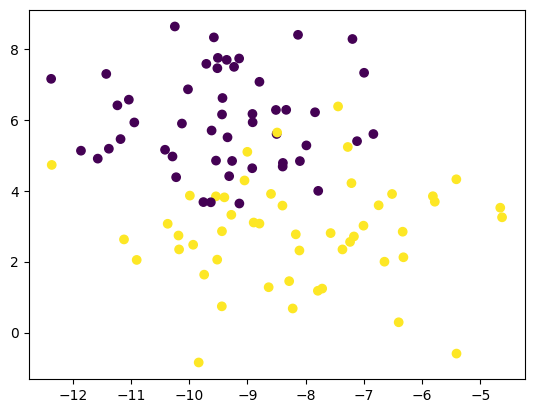

In [98]:
plt.scatter (X[:,0], X[:,1], c=y)
plt.show

6. Разбить данные на обучающую (train) и тестовую (test) выборки в пропорции 75% - 25% соответственно.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

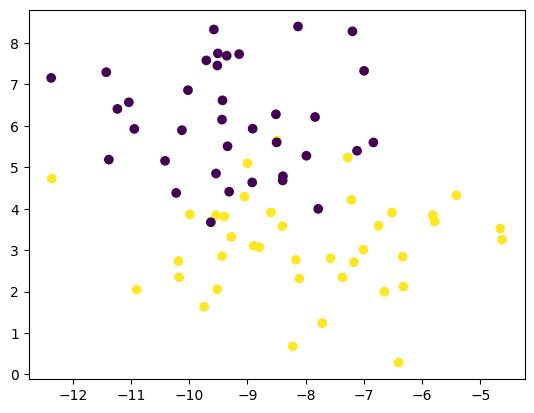

In [100]:
plt.scatter (X_train[:,0], X_train[:,1], c=y_train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

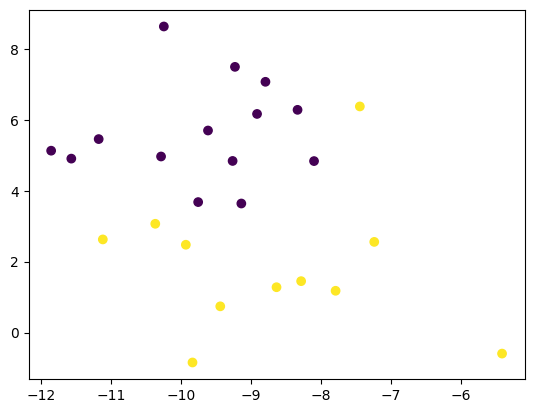

In [101]:
plt.scatter (X_test[:,0], X_test[:,1], c=y_test)
plt.show

8. Реализовать модели классификаторов, обучить их на обучающем множестве. Применить модели на тестовой выборке, вывести результаты классификации:



*   Истинные и предсказанные метки классов

*   Матрицу ошибок (confusion matrix)
*   Значения полноты, точности, f1-меры и аккуратности


*   Значение площади под кривой ошибок (AUC ROC)

*   Отобразить на графике область принятия решений по каждому классу

В качестве методов классификации использовать:

* Метод к-ближайших соседей (`n_neighbors` = {1, 3, 9})
* Наивный байесовский метод
* Случайный лес (`n_estimators` = {5, 15, 50})



In [102]:
knn = KNeighborsClassifier(n_neighbors= 1, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=1)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [103]:
prediction = knn.predict(X_test)

In [104]:
print ('Prediction and test: ')
print (prediction)
print (y_test)

Prediction and test: 
[0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]


In [105]:
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))

Confusion matrix: 
[[13  1]
 [ 1 10]]


In [106]:
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.92


In [107]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [108]:
roc_auc_score(y_test, prediction)

0.9188311688311689

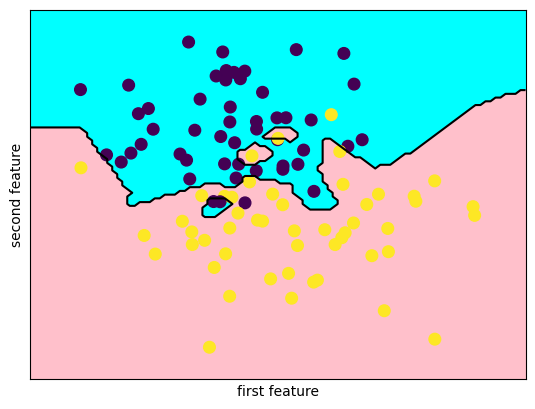

In [109]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [110]:
knn = KNeighborsClassifier(n_neighbors= 3, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=3)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [111]:
prediction = knn.predict(X_test)

In [112]:
print ('Prediction and test: ')
print (prediction)
print (y_test)

Prediction and test: 
[1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]


In [113]:
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))

Confusion matrix: 
[[12  2]
 [ 1 10]]


In [114]:
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.88


In [115]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [116]:
roc_auc_score(y_test, prediction)

0.8831168831168832

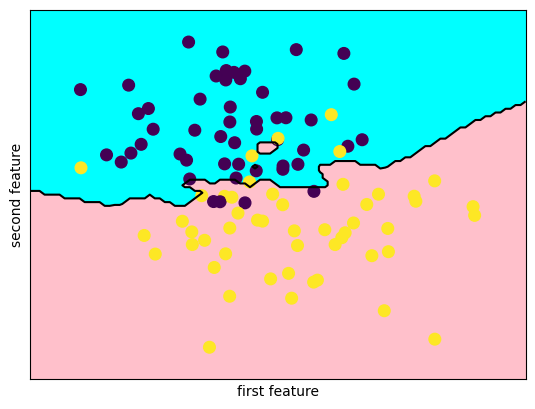

In [117]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [118]:
knn = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=9)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [119]:
prediction = knn.predict(X_test)

In [120]:
print ('Prediction and test: ')
print (prediction)
print (y_test)

Prediction and test: 
[1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]


In [121]:
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))

Confusion matrix: 
[[12  2]
 [ 1 10]]


In [122]:
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.88


In [123]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [124]:
roc_auc_score(y_test, prediction)

0.8831168831168832

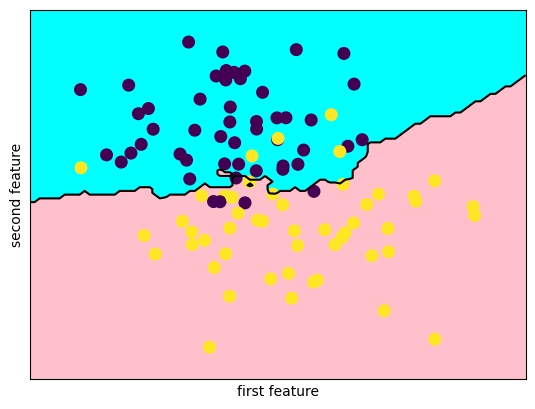

In [125]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [126]:
from sklearn.naive_bayes import GaussianNB

In [127]:
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [128]:
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.88


In [129]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [130]:
roc_auc_score(y_test, prediction)

0.8831168831168832

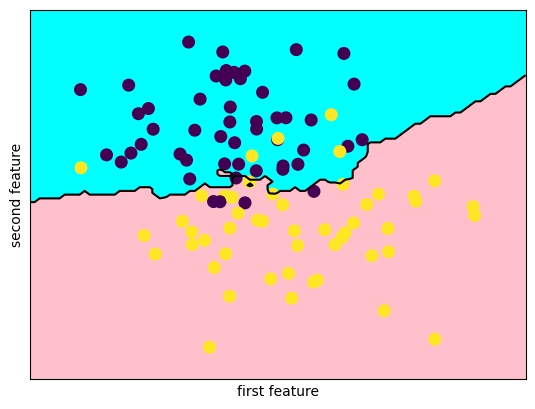

In [131]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
clf = RandomForestClassifier(n_estimators = 5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [134]:
print ('Prediction and test: ')
print (prediction)
print (y_test)

Prediction and test: 
[0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]


In [135]:
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))

Confusion matrix: 
[[13  1]
 [ 1 10]]


In [136]:
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.92


In [137]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [138]:
roc_auc_score(y_test, prediction)

0.9188311688311689

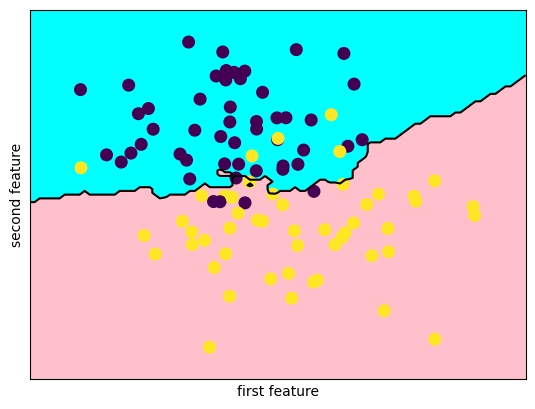

In [139]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [140]:
clf = RandomForestClassifier(n_estimators = 15)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [141]:
print ('Prediction and test: ')
print (prediction)
print (y_test)

Prediction and test: 
[0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]


In [142]:
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))

Confusion matrix: 
[[13  1]
 [ 1 10]]


In [143]:
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.92


In [144]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [145]:
roc_auc_score(y_test, prediction)

0.9188311688311689

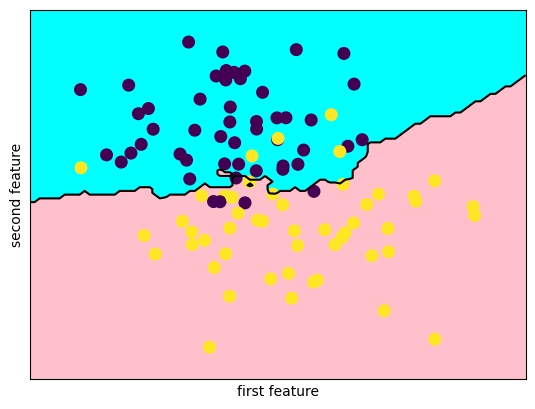

In [146]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [147]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [148]:
print ('Prediction and test: ')
print (prediction)
print (y_test)

Prediction and test: 
[0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1]
[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1]


In [149]:
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))

Confusion matrix: 
[[13  1]
 [ 1 10]]


In [150]:
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Accuracy score:  0.92


In [151]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [152]:
roc_auc_score(y_test, prediction)

0.9188311688311689

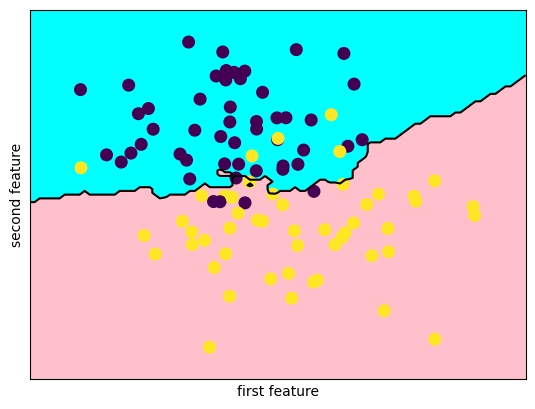

In [153]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

10. Изучить, как изменится качество классификации в случае другого разбиения выборки на обучающую и тестовую. Для этого повторить пункты 6, передав в параметр random_state новое значение, и пункты 8-9 дважды.

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [155]:
knn = KNeighborsClassifier(n_neighbors= 1, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=1)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.71      1.00      0.83        10

    accuracy                           0.84        25
   macro avg       0.86      0.87      0.84        25
weighted avg       0.89      0.84      0.84        25



In [156]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.8666666666666667
Accuracy score:  0.84


In [157]:
knn = KNeighborsClassifier(n_neighbors= 3, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=3)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.77      1.00      0.87        10

    accuracy                           0.88        25
   macro avg       0.88      0.90      0.88        25
weighted avg       0.91      0.88      0.88        25



In [158]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.9
Accuracy score:  0.88


In [159]:
knn = KNeighborsClassifier(n_neighbors= 9, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=9)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



In [160]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.85
Accuracy score:  0.84


In [161]:
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.77      1.00      0.87        10

    accuracy                           0.88        25
   macro avg       0.88      0.90      0.88        25
weighted avg       0.91      0.88      0.88        25



In [162]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.9
Accuracy score:  0.88


In [163]:
clf = RandomForestClassifier(n_estimators = 5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.71      1.00      0.83        10

    accuracy                           0.84        25
   macro avg       0.86      0.87      0.84        25
weighted avg       0.89      0.84      0.84        25



In [164]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.8666666666666667
Accuracy score:  0.84


In [165]:
clf = RandomForestClassifier(n_estimators = 15)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.77      1.00      0.87        10

    accuracy                           0.88        25
   macro avg       0.88      0.90      0.88        25
weighted avg       0.91      0.88      0.88        25



In [166]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.9
Accuracy score:  0.88


In [167]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.77      1.00      0.87        10

    accuracy                           0.88        25
   macro avg       0.88      0.90      0.88        25
weighted avg       0.91      0.88      0.88        25



In [168]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.9
Accuracy score:  0.88


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 87)

In [170]:
knn = KNeighborsClassifier(n_neighbors= 1, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=1)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [171]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.8814102564102563
Accuracy score:  0.88


In [172]:
knn = KNeighborsClassifier(n_neighbors= 3, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=3)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [173]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.8814102564102563
Accuracy score:  0.88


In [174]:
knn = KNeighborsClassifier(n_neighbors= 9, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=9)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.83      0.91        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [175]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.9166666666666667
Accuracy score:  0.92


In [176]:
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [177]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.9583333333333333
Accuracy score:  0.96


In [178]:
clf = RandomForestClassifier(n_estimators = 5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [179]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

1.0
Accuracy score:  1.0


In [180]:
clf = RandomForestClassifier(n_estimators = 15)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [181]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.9230769230769231
Accuracy score:  0.92


In [182]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [183]:
print(roc_auc_score(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

0.9615384615384616
Accuracy score:  0.96


9. По результатам п.8 занести в отчет таблицу с результатами классификации всеми методами.

10. Изучить, как изменится качество классификации в случае другого разбиения выборки на обучающую и тестовую. Для этого повторить пункты 6, передав в параметр random_state новое значение, и пункты 8-9 дважды.

11. По результатам трех экспериментов составить итоговую таблицу о качестве классификаци каждым методом, включив в нее значения полноты, точности, f1-меры, аккуратности и площади под кривой ошибок. Сделать выводы о наиболее подходящем методе классификации ваших данных

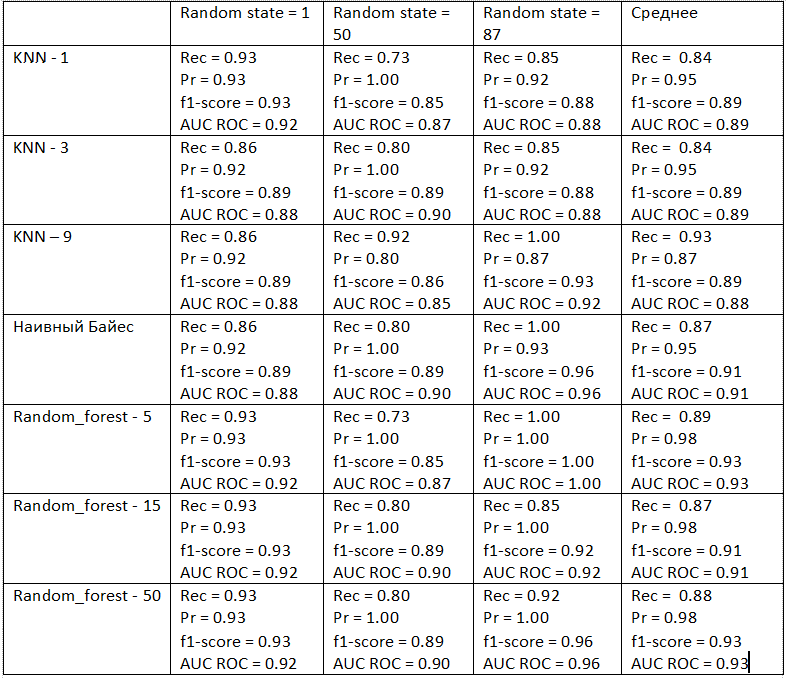

**Вывод:** Наилучшим классификатором оказался "Случайный лес" при разном количестве деревьев в лесу. Точность составляет 98%, также значение AUC ROC = 0.93, f1-score = 0.93 и Recall = 0.88, все оценки близки к 1.
